# Ejercicio 3

### Regresión lineal múltiple para grandes conjunto de datos.

En base al link dado en el problema (http://lib.stat.cmu.edu/datasets/bodyfat) podemos conocer un poco más de nuestro marco de datos por ejemplo en esta ocasión tenemos las siguientes variables de izquierda a derecha:

   * Density determined from underwater weighing
   * Percent body fat from Siri's (1956) equation
   * Age (years)
   * Weight (lbs)
   * Height (inches)
   * Neck circumference (cm)
   * Chest circumference (cm)
   * Abdomen 2 circumference (cm)
   * Hip circumference (cm)
   * Thigh circumference (cm)
   * Knee circumference (cm)
   * Ankle circumference (cm)
   * Biceps (extended) circumference (cm)
   * Forearm circumference (cm)
   * Wrist circumference (cm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bodyfat.csv")
df.head()

,density,percent_bodyfat,age,weight,height,neck_circumf,chest_circumf,abdomen2_circumf,hip_circumf,thigh_circumf,knee_circumf,ankle_circumf,biceps_circumf,forearm_circumf,wrist_circumf
0,1.0708,12.300000,23,154.25,67.75,36.200001,93.099998,85.199997,94.500000,59.000000,37.299999,21.900000,32.000000,27.400000,17.100000
1,1.0853,6.100000,22,173.25,72.25,38.500000,93.599998,83.000000,98.699997,58.700001,37.299999,23.400000,30.500000,28.900000,18.200001
2,1.0414,25.299999,22,154.00,66.25,34.000000,95.800003,87.900002,99.199997,59.599998,38.900002,24.000000,28.799999,25.200001,16.600000
3,1.0751,10.400000,26,184.75,72.25,37.400002,101.800003,86.400002,101.199997,60.099998,37.299999,22.799999,32.400002,29.400000,18.200001
4,1.0340,28.700001,24,184.25,71.25,34.400002,97.300003,100.000000,101.900002,63.200001,42.200001,24.000000,32.200001,27.700001,17.700001


Aqui tenemos que tomar en cuenta la información brindada por el ejercició que nos indica que el valor esperado es percent bodyfat (variable dependiente) y los demas serán las variables independientes.

## Preprocesando la data

Observamos los nombres de las columnas. Esto es muy importante ya que podemos obtener datasets con columnas que poseen nombres con espacios no deseados, por ejemplo "age " en vez de "age"

In [3]:
df.columns.values.tolist()

['density',
 'percent_bodyfat',
 'age',
 'weight',
 'height',
 'neck_circumf',
 'chest_circumf',
 'abdomen2_circumf',
 'hip_circumf',
 'thigh_circumf',
 'knee_circumf',
 'ankle_circumf',
 'biceps_circumf',
 'forearm_circumf',
 'wrist_circumf']

### Limpieza de datos

In [4]:
df.isna().sum()

density             0
percent_bodyfat     0
age                 0
weight              0
height              0
neck_circumf        0
chest_circumf       0
abdomen2_circumf    0
hip_circumf         0
thigh_circumf       0
knee_circumf        0
ankle_circumf       0
biceps_circumf      0
forearm_circumf     0
wrist_circumf       0
dtype: int64

Una vez realizado nuestro pre-procesamiento de los datos del marco de datos, podemos continuar con el análisis de los datos para conseguir un buen modelo.

### Análisis del marco de datos

Si queremos ver que variables aportan más o menos a nuestro modelo y por ende podemos agregar o quitarlo en el análisis primero veremos la correlación que existe entre estos parametros.

In [5]:
df.corr()

,density,percent_bodyfat,age,weight,height,neck_circumf,chest_circumf,abdomen2_circumf,hip_circumf,thigh_circumf,knee_circumf,ankle_circumf,biceps_circumf,forearm_circumf,wrist_circumf
density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472967,-0.682599,-0.798955,-0.609332,-0.553091,-0.495041,-0.264890,-0.487109,-0.351648,-0.325716
percent_bodyfat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894190,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
neck_circumf,-0.472967,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
chest_circumf,-0.682599,0.702620,0.176450,0.894190,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
abdomen2_circumf,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
hip_circumf,-0.609332,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
thigh_circumf,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


Recordemos que una correlación positiva indica que las dos variables están relacionadas directamente y caso contrario indirectamente.
También recordemos que una correlación cercana a 1 indica una fuerte correlación.
Como tenemos muchas variables es más conveniente verlo gráficamente por lo que tenemos lo siguiente:

#### Visualización de la correlación entre las variables

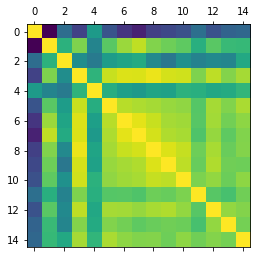

In [6]:
plt.matshow(df.corr())

En donde los valores más claros indican una fuerte correlación y los valores más oscuros una correlación baja.

**Nota**: Los cuadrados amarillos indican una correlación igual a uno ya que se refiere a la correlación de una variable consigo misma.

Como podemos ver cuando existe baja correlación no se aprecia bien el direccionamiento lineal de la variable predictora con la variable dependiente.

Text(0.5, 1.0, 'relacion tobillo(ankle) - porcentaje cuerpograso(bodyfat)')

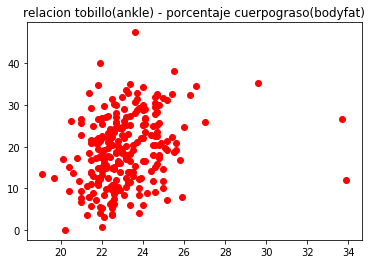

In [7]:
plt.plot(df["ankle_circumf"],df["percent_bodyfat"], 'ro')
plt.title("relacion tobillo(ankle) - porcentaje cuerpograso(bodyfat)")

Caso contrario cuando si existe correlación se aprecia claramente la tendencia lineal...

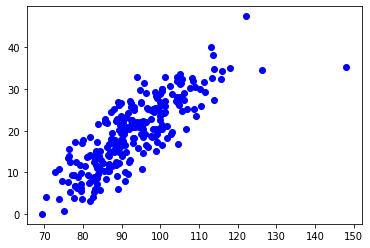

In [8]:
plt.plot(df["abdomen2_circumf"],df["percent_bodyfat"], 'bo')

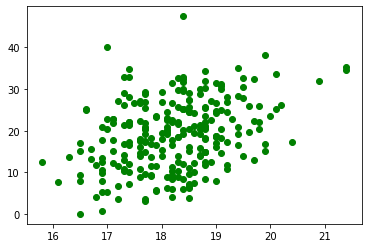

In [9]:
plt.plot(df["wrist_circumf"],df["percent_bodyfat"],'go')

### P-valores

Como no solo la correlación ayudará a definir que variables o no ponemos en nuestro modelo, usaremos los p-valores que por estadística inferencial se sabe que a menor p-valor existira gran probabilidad de que la variable intervenga en nuestro modelo drásticamente.

In [10]:
import statsmodels.formula.api as smf

*Nota:* Cuando usamos la librería statsmodels no podemos poner nombres con espacios como "percent bodyfat"

In [11]:
lm = smf.ols(formula="percent_bodyfat~age+weight+height+neck_circumf+chest_circumf+abdomen2_circumf+hip_circumf+thigh_circumf+knee_circumf+ankle_circumf+biceps_circumf+forearm_circumf+wrist_circumf",
              data=df).fit()

In [12]:
lm.pvalues

Intercept           2.955106e-01
age                 5.617576e-02
weight              9.977479e-02
height              4.692550e-01
neck_circumf        4.404900e-02
chest_circumf       8.099996e-01
abdomen2_circumf    3.633490e-23
hip_circumf         1.562233e-01
thigh_circumf       1.032622e-01
knee_circumf        9.496987e-01
ankle_circumf       4.328524e-01
biceps_circumf      2.896632e-01
forearm_circumf     2.410188e-02
wrist_circumf       2.719508e-03
dtype: float64

Observamos como el p-valor de abdomen2_circumf es el más bajo de todos es decir que influirá muy fuertemente en nuestro modelo y que si o si deberá estar presente en nuestro análisis, el siguiente más bajo es wrist_circumf por lo que también esta fuertemente ligado al modelo.

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent_bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.72e-64
Time:                        14:21:59   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -18.1885     17.349     -1.048      0.296     -52.365      15.988
age                  0.0621      0.032      1.919      0.056      -0.002       0.126
weight              -0.0884      0.054     -1.652      0.100      -0.194       0.017
height              -0.0696      0.096     -0.725      0.469      -0.259       0.120
neck_circumf        -0.4706      0.232     -2.024      0.044      -0.929      -0.013
chest_circumf       -0.0239      0.099     -0.241      0.810      -0.219       0.171
abdomen2_circumf     0.9548      0.086     11.044      0.000       0.784       1.125
hip_circumf         -0.2075      0.146     -1.422      0.156      -0.495       0.080
thigh_circumf        0.2361      0.144      1.636      0.103      -0.048       0.520
knee_circumf         0.0153      0.242      0.063      0.950      -0.461       0.492
ankle_circumf        0.1740      0.221      0.786      0.433      -0.262       0.610
biceps_circumf       0.1816      0.171      1.061      0.290      -0.156       0.519
forearm_circumf      0.4520      0.199      2.270      0.024       0.060       0.844
wrist_circumf       -1.6206      0.535     -3.030      0.003      -2.674      -0.567
==============================================================================
Omnibus:                        4.404   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.820
Skew:                          -0.012   Prob(JB):                        0.244
Kurtosis:                       2.482   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observamos también un F-test bien alto y una probabilidad (F-test) bien bajo por lo que nuestro modelo se puede decir que ajusta bien en comparación a un modelo con solo intercepto.

### Error estándar residual

In [14]:
y_mean = np.mean(df["percent_bodyfat"])

RSS = np.sum((df["percent_bodyfat"]-lm.predict(df[["age","weight","height","neck_circumf","chest_circumf","abdomen2_circumf","hip_circumf","thigh_circumf","knee_circumf","ankle_circumf","biceps_circumf","forearm_circumf","wrist_circumf"]]))**2)

RSE = np.sqrt(RSS/(len(df)-13-1))
print('RSE: '+str(RSE))
RSE / y_mean * 100

RSE: 4.30528712171906


22.480985441776706

Tenemos un error producido por el modelo de 22.48%.

Como tenemos muchos valores y algunos no aportan nada al modelo entonces podemos obviarlos.

### Quitando variables independientes innecesarias

Como habiamos dicho no puede faltar abdomen2_circumf ni wrist_circumf por lo que podemos comenzar a analizar un modelo solo con estas dos variables.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# new feature_cols

feature_cols = ["abdomen2_circumf","wrist_circumf"]

In [17]:
X = df[feature_cols]
Y = df["percent_bodyfat"]

In [18]:
lm2 = LinearRegression()
lm2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lm2.intercept_)
print(lm2.coef_)

-8.850363604476115
[ 0.75443018 -2.29437153]


In [20]:
list(zip(feature_cols,lm2.coef_))

[('abdomen2_circumf', 0.7544301808710354),
 ('wrist_circumf', -2.294371531289154)]

In [21]:
lm2.score(X,Y)

0.7020143178412656

In [22]:
# Error estándar residual

y2_mean = np.mean(Y)

RSS = np.sum((Y-lm2.predict(X))**2)

RSE = np.sqrt(RSS/(len(df)-2-1))
print('RSE:'+str(RSE))
RSE/ y2_mean * 100

RSE:4.586643434498386


23.950148123084343

Podemos ver como un error de 23% que antes era 22% no es demasiado brusco.
Mientras que el valor de R-cuadrado es 70% en vez del 74% que teniamos antes.

### Mejorando un poco más el modelo

Es muy usual querer seguir con este proceso y agregar a los de los p-valores más bajo como forearm_circumf y height, pero se debe tener en cuenta que podemos presentar problemas de **múltiple colinealidad**.

Es decir una variable independiente puede estar correlacionada con otra variable independiente por lo que esto no mejorará nuestro modelo, en este caso al tener tantas columnas y estar correlacionadas muchas variables podemos intuir con las correlaciones entre los p-valores más bajos y su correlación con las columnas candidatas a elegir.

In [23]:
lm3 = LinearRegression()


feature_cols = ["forearm_circumf","abdomen2_circumf","wrist_circumf"]

X3 = df[feature_cols]
Y3 = df["percent_bodyfat"]

lm3.fit(X3,Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm3.score(X3,Y3)

0.7027890116176005

In [25]:
# Error estándar residual

y3_mean = np.mean(Y3)

RSS = np.sum((Y3-lm3.predict(X3))**2)

RSE = np.sqrt(RSS/(len(df)-3-1))
print('RSE:'+str(RSE))
RSE/ y3_mean * 100

RSE:4.589903394773613


23.967170708899456

Podemos ver que el valor R-cuadrado no aumentó casi nada, mientras en el error producido por el modelo ya va a llegar a 24%.

### Modelo mejorado

Como vamos agregando columnas podemos obtener la cantidad necesaria de columnas para tener el mismo error y casi el mismo valor R-cuadrado sin usar las 13 columnas sino las 6 más influyentes en nuestro modelo, que no son otros que los 6 valores con los p-valores más bajos.

In [26]:
lm4 = LinearRegression()


feature_cols = ["age","neck_circumf","forearm_circumf","weight","abdomen2_circumf","wrist_circumf"]

X4 = df[feature_cols]
Y4 = df["percent_bodyfat"]

lm4.fit(X4,Y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm4.score(X4,Y4) # R-cuadrado

0.7406429211147518

In [28]:
# Error estándar residual

y4_mean = np.mean(Y4)

RSS = np.sum((Y4-lm4.predict(X4))**2)

RSE = np.sqrt(RSS/(len(df)-6-1))
print('RSE:'+str(RSE))
RSE/ y4_mean * 100

RSE:4.313829392370099


22.52559075071811

In [29]:
print(lm4.intercept_)
list(zip(feature_cols,lm4.coef_))

-25.892721544082157


[('age', 0.04605355291690751),
 ('neck_circumf', -0.4003934284944702),
 ('forearm_circumf', 0.5721015522254352),
 ('weight', -0.0938578148004914),
 ('abdomen2_circumf', 0.945259890706665),
 ('wrist_circumf', -1.5856736703539815)]

Entonces podemos ver que la ecuación que mejor se ajusta al modelo con un error de 22% pero un error estándar residual muy parecido al usar todos las columnas es:

$$Y = -25.892721544082157 + 0.0460535529169075*age -0.4003934284944702*neck + 0.5721015522254352*forearm -0.0938578148004914*weight + 0.945259890706665*abdomen -1.5856736703539815*wrist  $$

Cabe destacar que los coeficientes de peso(weight) y muñeca(wrist) influye negativamente en el porcentaje de grasa corporal.

### Valores atípicos 

#### Distancia de Cook

El criterio de Cook consiste en construir un intervalo de confianza de los coeficientes de regresión del 50%. Estimar de nuevo estos coeficientes sin el valor que se quiere ver su influencia. Si el nuevo valor estimado queda dentro del intervalo de confianza anterior se considera una influencia aceptable. Si, por el contrario, se sale de este intervalo, estamos ante un exceso de influencia que conviene replantearse. Una opción clara es eliminar el valor del análisis.

También se puede comparar este valor con 4/n donde n es la cantidad de valores que tenemos.

In [30]:
# Diagnóstico 
prueba = lm.get_influence()
sm_fr = prueba.summary_frame()
sm_fr[sm_fr["cooks_d"]>4/len(df)]

,dfb_Intercept,dfb_age,dfb_weight,dfb_height,dfb_neck_circumf,dfb_chest_circumf,dfb_abdomen2_circumf,dfb_hip_circumf,dfb_thigh_circumf,dfb_knee_circumf,dfb_ankle_circumf,dfb_biceps_circumf,dfb_forearm_circumf,dfb_wrist_circumf,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
30,0.107885,0.026346,0.102359,-0.052922,-0.093753,-0.037178,-0.030024,-0.053200,0.068397,0.053109,-0.483287,-0.046649,0.055937,0.101998,0.018222,-0.755286,0.309012,-0.505085,-0.754603,-0.504628
38,-0.390383,-0.280034,-0.724408,0.402575,-0.463188,0.634842,0.282118,-0.377716,0.255287,0.403437,-0.118705,-0.087073,0.819249,0.286895,0.288967,-2.595977,0.375120,-2.011351,-2.627992,-2.036155
53,0.032728,0.028087,0.058997,-0.062105,0.134633,0.004109,-0.013709,-0.012047,0.143266,-0.071520,0.013692,-0.434891,0.151790,-0.083743,0.016839,-1.135342,0.154616,-0.485541,-1.136035,-0.485838
80,-0.093439,0.000930,-0.119665,-0.049002,0.113721,-0.152342,0.223730,0.037734,-0.094841,0.050881,0.123248,-0.077515,-0.041512,0.172826,0.016604,2.194199,0.046058,0.482134,2.212073,0.486062
81,-0.260416,0.080656,-0.307374,0.068207,0.292811,0.116065,-0.047934,0.256833,-0.077337,0.186606,0.042222,0.069920,-0.210701,-0.067952,0.020131,2.126982,0.058644,0.530883,2.142974,0.534874
85,-0.089132,0.321480,-0.093708,-0.029002,-0.000814,-0.012452,0.024477,0.047663,-0.069936,-0.207416,1.175400,0.168389,-0.002805,-0.301752,0.107163,1.647220,0.356055,1.224859,1.653206,1.229311
127,0.033200,0.023385,0.004585,-0.084147,0.112248,0.115230,-0.245666,0.112695,-0.162804,0.002081,-0.116721,0.265213,-0.060785,-0.104164,0.017016,2.008882,0.055741,0.488085,2.021872,0.491241
174,-0.111089,-0.188037,-0.114745,0.025016,0.068409,0.173656,-0.048058,0.056392,0.040670,0.075752,-0.094029,0.108952,-0.587172,0.261406,0.030543,1.071567,0.271345,0.653913,1.071903,0.654117
206,-0.139539,-0.070790,-0.240167,-0.041198,0.284468,0.015063,0.072349,0.199652,-0.113699,0.081156,-0.042569,0.112877,0.115403,-0.190349,0.017957,2.375507,0.042650,0.501395,2.399124,0.506379
215,0.044365,-0.132935,-0.037199,-0.083938,0.046995,-0.005200,0.230793,0.136115,-0.178695,-0.277773,0.089778,0.022179,-0.005797,-0.024873,0.024894,1.578197,0.122752,0.590356,1.583184,0.592222


Entonces dejando a fuera a estos valores tenemos ...

In [31]:
atipicos = sm_fr[sm_fr["cooks_d"]>4/len(df)].index.tolist()

df2 = df.drop(df.index[atipicos]) # borrando valores atipicos

In [32]:
lm5 = LinearRegression()

X5 = df2[feature_cols]
Y5 = df2["percent_bodyfat"]

lm5.fit(X5,Y5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lm5.score(X5,Y5)

0.7550467058140959

In [34]:
# Error estándar residual

y5_mean = np.mean(Y5)

RSS = np.sum((Y5-lm5.predict(X5))**2)

RSE = np.sqrt(RSS/(len(df)-6-1))
print('RSE:'+str(RSE))
RSE/ y5_mean * 100

RSE:3.945112123772186


20.895350589823178

Hemos visto como el R-cuadrado mejoro mucho:
75% y también como el error se redujo al 20% al eliminar estos valores atípicos.

#### Viendo sus estadísticos

In [39]:
# usaremos statsmodels para ver los estadísticos de este último modelo ya refinado.
lm7 = smf.ols(formula="percent_bodyfat~age+weight+abdomen2_circumf+neck_circumf+forearm_circumf+wrist_circumf",
              data=df).fit()

In [40]:
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent_bodyfat   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.76e-69
Time:                        14:27:15   Log-Likelihood:                -722.40
No. Observations:                 252   AIC:                             1459.
Df Residuals:                     245   BIC:                             1484.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -25.8927      8.187     -3.163      0.002     -42.018      -9.767
age                  0.0461      0.029      1.605      0.110      -0.010       0.103
weight              -0.0939      0.031     -2.984      0.003      -0.156      -0.032
abdomen2_circumf     0.9453      0.068     13.824      0.000       0.811       1.080
neck_circumf        -0.4004      0.222     -1.805      0.072      -0.837       0.036
forearm_circumf      0.5721      0.186      3.084      0.002       0.207       0.938
wrist_circumf       -1.5857      0.512     -3.095      0.002      -2.595      -0.576
==============================================================================
Omnibus:                        5.190   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.145
Skew:                          -0.010   Prob(JB):                        0.208
Kurtosis:                       2.453   Cond. No.                     6.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observamos que en el comienzo F-test era 54.65 y ahora 116.6 por lo que podemos decir que hubo una mejora en este modelo con respecto a los anteriores.

**Conclusión**

Podemos concluir que la data presenta valores atípicos que retirándolos mejora el modelo y que éste modelo no necesariamente debe tener las 13 columnas originales, sino que de manera práctica podemos tomar 6 columnas con los p-valores más bajos y que estos no estos no presentan significativamente problema de múltiplecolinealidad. Con un buen valor de F-test y un error mejor que al inicio tenemos al final un buen modelo con un R-cuadrado de 75% y un error del 20% cometido por el modelo.